### **Ejercicio N°6**

Utilizando el dataset `calidad_producto.csv`, que contiene dos variables registradas en el área de control de calidad de una industria:

- `desviacion_largo`: desviación del largo del producto respecto a un valor estándar o deseado.
- `indice_calidad_producto`: índice o puntuación que se construye a partir de una serie de
aspectos relacionados a la calidad general del producto.











In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [74]:
calidad = pd.read_csv("/content/calidad_producto.csv", sep=";")
calidad.head(5)

,desviacion_largo,indice_calidad_producto
0,-1.090,-0.744
1,0.997,0.720
2,-0.579,-0.548
3,1.270,0.935
4,1.490,0.942


In [75]:
print(f"Cantidad de filas: {len(calidad)}\n {calidad.info()}, \n{calidad.describe()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   desviacion_largo         200 non-null    float64
 1   indice_calidad_producto  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB
Cantidad de filas: 200
 None, 
       desviacion_largo  indice_calidad_producto
count        200.000000               200.000000
mean           0.025489                 0.105108
std            1.112120                 1.446126
min           -3.230000                -1.320000
25%           -0.708000                -0.635500
50%            0.011575                -0.010680
75%            0.739750                 0.604000
max            5.000000                15.000000


1. Calcule los coeficientes de correlación de Pearson y Spearman entre ambas variables. Interprete los valores obtenidos en relación al tipo de información que le brinda cada uno acerca del grado de asociación entre las variables.

In [76]:
calidad.corr()

,desviacion_largo,indice_calidad_producto
desviacion_largo,1.000000,0.561225
indice_calidad_producto,0.561225,1.000000


In [77]:
calidad.corr(method="spearman")

,desviacion_largo,indice_calidad_producto
desviacion_largo,1.000000,0.940055
indice_calidad_producto,0.940055,1.000000


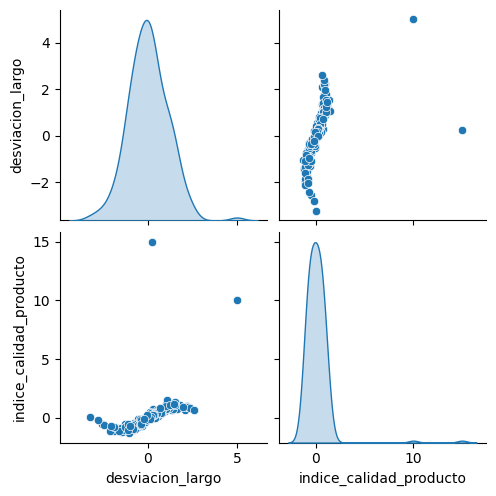

In [78]:
sns.pairplot(calidad, diag_kind='kde')

2. Construya un gráfico que le permita visualizar la relación general que existe entre las variables analizadas. ¿Qué observa?

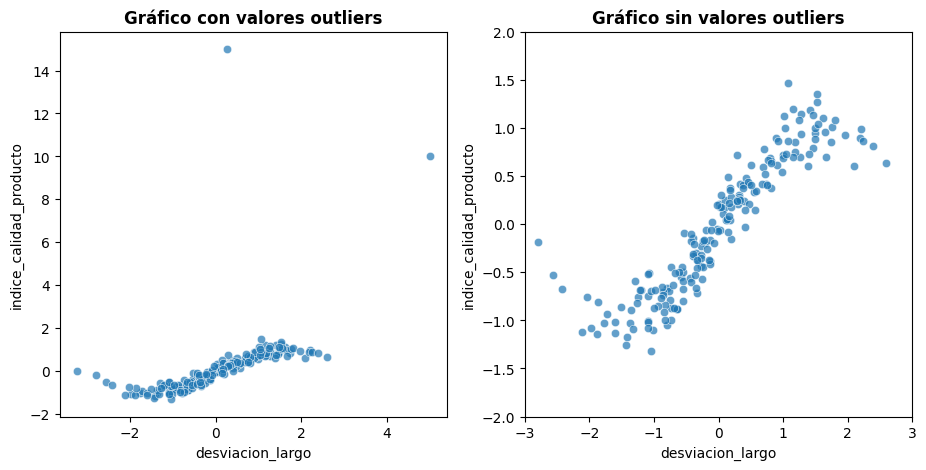

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(11,5))
sns.scatterplot(calidad, x="desviacion_largo", y="indice_calidad_producto", alpha=0.7, ax=axes[0])
sns.scatterplot(calidad, x="desviacion_largo", y="indice_calidad_producto", alpha=0.7, ax=axes[1])
axes[0].set_title("Gráfico con valores outliers", weight='bold')
axes[1].set_title("Gráfico sin valores outliers", weight='bold')
axes[1].set_ylim(-2,2)
axes[1].set_xlim(-3, 3)
plt.show()

3. Calcule nuevamente ambos coeficientes sin tomar en cuenta los registros que incluyan
observaciones potencialmente atípicas. ¿Cómo resultan los valores obtenidos en comparación
con los calculados en el ítem 1?

In [80]:
print(calidad)

     desviacion_largo  indice_calidad_producto
0              -1.090                 -0.74400
1               0.997                  0.72000
2              -0.579                 -0.54800
3               1.270                  0.93500
4               1.490                  0.94200
..                ...                      ...
195            -0.359                 -0.52800
196            -0.978                 -0.68000
197            -0.030                  0.20200
198            -3.230                  0.00784
199            -0.218                 -0.16700

[200 rows x 2 columns]


In [89]:
q1_desv_largo = calidad['desviacion_largo'].quantile(0.25)
q3_desv_largo = calidad['desviacion_largo'].quantile(0.75)
riq_desv_largo = q3_desv_largo - q1_desv_largo
limite_inferior_desv_largo = q1_desv_largo - 1.5 * riq_desv_largo
limite_superior_desv_largo = q3_desv_largo + 1.5 * riq_desv_largo

q1_ind_cal_prod = calidad['indice_calidad_producto'].quantile(0.25)
q3_ind_cal_prod = calidad['indice_calidad_producto'].quantile(0.75)
riq_ind_cal_prod = q3_ind_cal_prod - q1_ind_cal_prod
limite_inferior_ind_cal_prod = q1_ind_cal_prod - 1.5 * riq_ind_cal_prod
limite_superior_ind_cal_prod = q3_ind_cal_prod + 1.5 * riq_ind_cal_prod
sin_outliers = calidad[(
    calidad['desviacion_largo'] < limite_superior_desv_largo) & (calidad['desviacion_largo'] > limite_inferior_desv_largo)
    & (calidad['indice_calidad_producto'] < limite_superior_ind_cal_prod) & (calidad['indice_calidad_producto'] > limite_inferior_ind_cal_prod)]

In [90]:
print(sin_outliers)

     desviacion_largo  indice_calidad_producto
0              -1.090                  -0.7440
1               0.997                   0.7200
2              -0.579                  -0.5480
3               1.270                   0.9350
4               1.490                   0.9420
..                ...                      ...
194             0.140                  -0.0842
195            -0.359                  -0.5280
196            -0.978                  -0.6800
197            -0.030                   0.2020
199            -0.218                  -0.1670

[197 rows x 2 columns]


In [91]:
sin_outliers.corr()

,desviacion_largo,indice_calidad_producto
desviacion_largo,1.000000,0.901743
indice_calidad_producto,0.901743,1.000000


Vemos que ahora que quitamos los valores outliers, la correlación de pearson (mucho más sensible a los valores atípicos) se acerca más, a la correlación de spearman que mide correlación monotónica, sin importar si es lineal o no.

In [92]:
sin_outliers.corr(method='spearman')

,desviacion_largo,indice_calidad_producto
desviacion_largo,1.000000,0.950463
indice_calidad_producto,0.950463,1.000000


 Como no es lineal la relación, la correlación de spearman es mayor a la de pearson, incluso habiendo quitado los valores outliers

4. En función de las características de la relación entre ambas variables que se observan
gráficamente, ¿cuál de las dos métricas informaría para describir en forma cuantitativa el grado de asociación entre ellas?

Como no es lineal la relación, la correlación de spearman es mayor a la de pearson, incluso habiendo quitado los valores outliers